In [1]:
#Import Libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import ast
#Load Data
df = pd.read_csv('C:\\Users\\Joseans-M17\\Documents\\VScode VENV\\data_jobs.csv')
#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Goal: Compare salaries  between job roles and their senior roles

In [8]:
# Filter for US jobs
df_US = df[(df['job_country'] == 'United States')].dropna(subset='salary_year_avg')

# Get top jobs
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()

df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [13]:
# Sort job titles by indexing the job title after sorting by median value
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

Start plotting

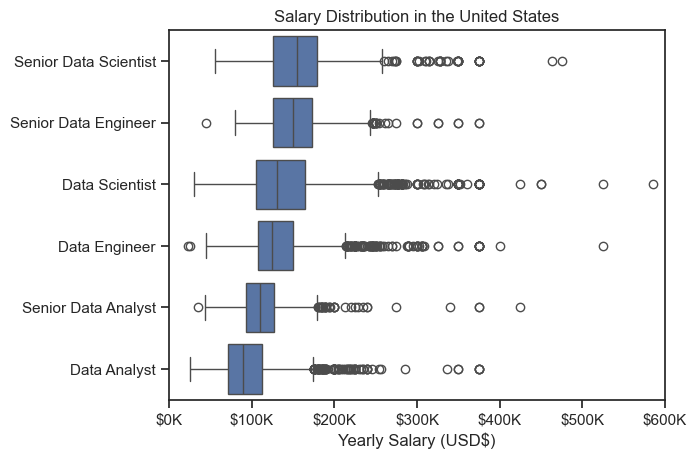

In [14]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary (USD$)')
plt.ylabel("")
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

Investigate Median Salary Vs Skill for DA

In [24]:
# Filter for Data Analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

# change job_skills list to seperate values
df_DA_US = df_DA_US.explode('job_skills')

In [37]:
# Get the top paying skills
df_DA_TP = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_TP = df_DA_TP.head(10)

# Get the top popular skills
df_DA_SK = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_SK = df_DA_SK.head(10).sort_values(by='median', ascending=False)

Start plotting #unedited from seaborn lesson

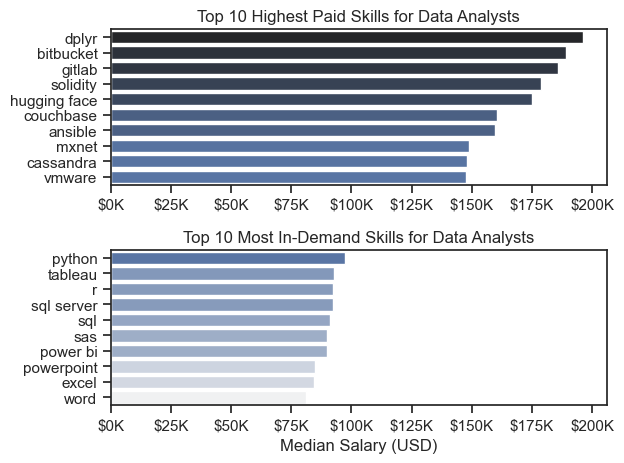

In [38]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')

# You can invert Y axis by using ax[#].invert_yaxis() in a new line or by adding [::-1] at the end of the variable before plotting
#df_DA_TP[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
# ax[0].invert_yaxis()

sns.barplot(data=df_DA_TP, x='median', y=df_DA_TP.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()

ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

#df_DA_SK.plot(kind='barh', y='median', ax=ax[1], legend=False)

sns.barplot(data=df_DA_SK, x='median', y=df_DA_SK.index, ax=ax[1], hue='median', palette='light:b')
ax[1].legend().remove()

ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()